In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\91630\Machine Learning\Projects\New Project\econometrics.com_intro_SALES.txt")

In [3]:
df.columns = ['Sales','Advertising ']

In [4]:
df.dtypes

Sales           float64
Advertising     float64
dtype: object

In [20]:
df['Advertising '].median()

23.0

In [5]:
df.describe()

,Sales,Advertising
count,36.000000,36.000000
mean,24.255556,28.527778
std,6.185118,18.777625
min,12.000000,1.000000
25%,20.300000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000


In [6]:
x= df['Sales'].values

In [7]:
y = df['Advertising '].values

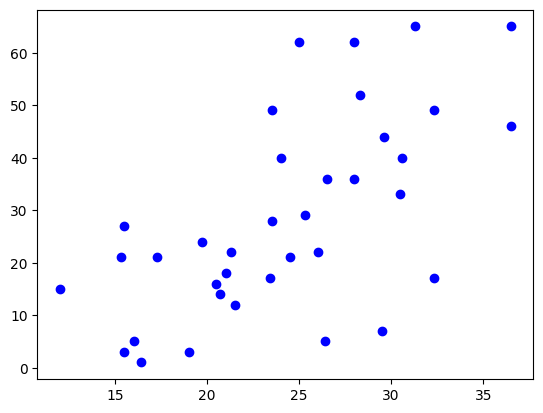

In [8]:
plt.scatter(x,y,color='blue')

In [9]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(12, 1)
(12, 1)


In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [13]:
lm.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred=lm.predict(X_test)

In [15]:
a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b) 

Estimated model slope, a: [[1.60509347]]
Estimated model intercept, b: (array([-11.16003616]),)


In [16]:
lm.predict(x)[:5]

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 11.2273


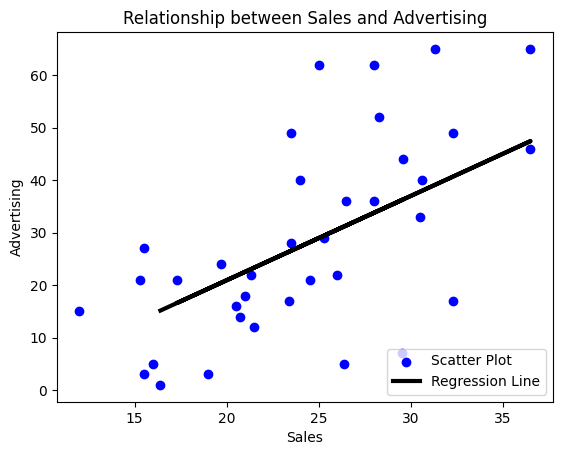

In [33]:
plt.scatter(x, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

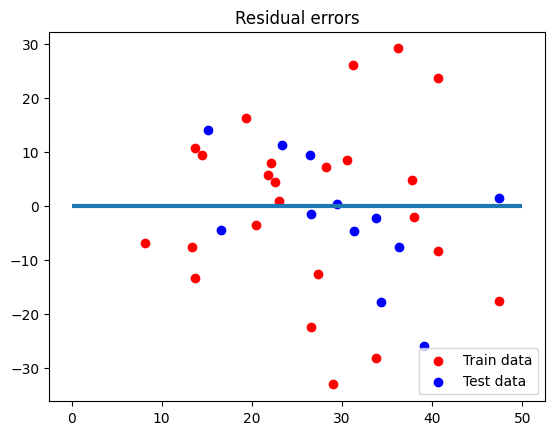

In [34]:
# Plotting residual errors

plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()